Description:
This notebook contains code for making all graphs and tables used in the paper, except for the maps, they are in Geopandas.ipynb 

In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

#plotting
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#plotting
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff


import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import os

In [3]:
df = pd.read_pickle(r'data\df.pkl')

# Descriptive Statistics

In [4]:
df.head(2)

,area,workforce,managers,professional,associate,administrative,skilled_trades,caring,sales,process,...,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,average_temperature,rainfall,latitude,longitude,surface,population_density
1,Derby,"123,400.00",8.80,20.10,14.20,8.00,10.30,8.40,9.70,8.20,...,2.59,-77.50,-64.00,24.41,9.16,0.24,52.92,-1.47,78.00,"3,189.13"
2,Derbyshire,"394,500.00",11.50,18.40,14.80,9.80,12.40,9.40,6.80,8.20,...,-13.97,-56.28,-62.69,23.56,9.07,0.18,53.10,-1.60,"2,546.00",302.31


In [5]:
df.columns

Index(['area', 'workforce', 'managers', 'professional', 'associate',
       'administrative', 'skilled_trades', 'caring', 'sales', 'process',
       'elementary', 'area_code', 'All usual residents', 'Age 0 to 4',
       'Age 5 to 7', 'Age 8 to 9', 'Age 10 to 14', 'Age 15', 'Age 16 to 17',
       'Age 18 to 19', 'Age 20 to 24', 'Age 25 to 29', 'Age 30 to 44',
       'Age 45 to 59', 'Age 60 to 64', 'Age 65 to 74', 'Age 75 to 84',
       'Age 85 to 89', 'Age 90 and over', 'key', 'share_65', 'population',
       'mobility_retail_and_recreation', 'mobility_grocery_and_pharmacy',
       'mobility_parks', 'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential', 'average_temperature', 'rainfall', 'latitude',
       'longitude', 'surface', 'population_density'],
      dtype='object')

In [5]:
mobility_measures = [x for x in df.columns if 'mobility_' in x]
workforce_measures = ['managers', 'professional', 'associate', 'administrative','skilled_trades',
                     'caring', 'sales', 'process', 'elementary']

age_measures = ['share_65','Age 0 to 4', 'Age 5 to 7',
       'Age 8 to 9', 'Age 10 to 14', 'Age 15', 'Age 16 to 17', 'Age 18 to 19',
       'Age 20 to 24', 'Age 25 to 29', 'Age 30 to 44', 'Age 45 to 59',
       'Age 60 to 64', 'Age 65 to 74', 'Age 75 to 84', 'Age 85 to 89',
       'Age 90 and over']
weather_measures = [ 'average_temperature','rainfall', 'latitude', 'longitude']

In [6]:
df[mobility_measures].describe()

,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential
count,103.00,103.00,103.00,103.00,103.00,103.00
mean,-75.41,-32.50,-16.10,-65.62,-63.39,24.51
std,3.67,3.50,14.11,8.79,3.90,2.59
min,-86.47,-41.62,-45.94,-86.78,-73.62,20.47
25%,-77.62,-35.11,-26.48,-71.98,-65.38,22.57
50%,-74.91,-32.31,-15.50,-64.44,-63.19,24.06
75%,-73.34,-30.09,-6.97,-59.88,-61.02,25.48
max,-66.38,-23.78,17.09,-43.25,-52.75,32.38


# PCA on mobility

## Examining how mobility measures correlate

In [7]:
mobility_measures_ordered = ['mobility_residential','mobility_parks','mobility_transit_stations',
 'mobility_workplaces','mobility_grocery_and_pharmacy','mobility_retail_and_recreation']
mobility_measures_ordered = mobility_measures_ordered[::-1]

df_graph = df[mobility_measures_ordered].corr().iplot(kind='heatmap', colorscale='Rdbu',asFigure=True)

#df_graph['data'][0]['reversescale']=True

#other layout formatting
df_graph['layout']['paper_bgcolor']='#FFFFFF'
df_graph['layout']['plot_bgcolor']='#FFFFFF'

df_graph['layout']['xaxis']['showgrid']=False
df_graph['layout']['yaxis']['showgrid']=False

df_graph['layout']['width']=800
df_graph['layout']['height']=400

df_graph['layout']['margin']['t']=0
df_graph['layout']['margin']['b']=0
df_graph['layout']['margin']['l']=0
df_graph['layout']['margin']['r']=120
df_graph['layout']['yaxis']['tickfont']['size']=15
df_graph['layout']['xaxis']['tickfont']['size']=15
df_graph['layout']['yaxis']['tickfont']['family']='Arial'
df_graph['layout']['xaxis']['tickfont']['family']='Arial'
df_graph['layout']['yaxis']['tickformat'] = ".0%"

#df_graph['layout']['yaxis']['title']['text']="Mobility indicator" 
#df_graph['layout']['xaxis']['title']['text']="Mobility indicator"
df_graph['layout']['yaxis']['title']['font']['family']='Bree Serif' 
df_graph['layout']['xaxis']['title']['font']['family']='Bree Serif'
df_graph['layout']['yaxis']['title']['font']['size']=18
df_graph['layout']['xaxis']['title']['font']['size']=18
df_graph['layout']['legend']['font']['family']='Arial'
df_graph['layout']['legend']['font']['size']=18

annotations=[]
cmap=sns.color_palette('Greens_r',100)
cmap=['rgb({0},{1},{2})'.format(x[0], x[1], x[2]) for x in cmap]
#cmap.reverse()
for i,y_value in enumerate(df_graph['data'][0]['y']):
    for j,x_value in enumerate(df_graph['data'][0]['x']):
        text=df_graph['data'][0]['z'][i][j]
        color=cmap[int(text*10)]
        text="{0:.1%}".format(text)
        #print(y_value, x_value,text)
        annotations.append(dict(xref='x', yref='y',
                    x=x_value, y=y_value,xanchor='center',
                    text=text, font=dict(family='Arial', size=16,
                    color=color),showarrow=False, align='center'))
df_graph['layout']['annotations']=annotations

In [8]:
iplot(df_graph)

## PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
df_pca = df[mobility_measures].copy().dropna()
df_pca = (df_pca-df_pca.mean())/df_pca.std()

In [11]:
pca = PCA(n_components=2)
result = pca.fit_transform(df_pca)

In [12]:
print(pca.components_)

[[-0.42494528 -0.36167524  0.00940933 -0.45926761 -0.51319311  0.46284996]
 [ 0.34914686  0.42526815  0.74153556 -0.11927157 -0.18462603  0.31473166]]


In [13]:
print(pca.explained_variance_ratio_)

[0.48485873 0.21842397]


In [17]:
print("Only 70% of variation is explained by first two factors")

Only 70% of variation is explained by first two factors


In [16]:
48+22

70

In [18]:
df_pca['1st_component'] = pd.DataFrame(result)[0]
df_pca['2nd_component'] = pd.DataFrame(result)[1]

In [21]:
#checking the relationship between factors and mobility indicators
df_pca.corr()[['1st_component','2nd_component']]

,1st_component,2nd_component
mobility_retail_and_recreation,-0.19,0.11
mobility_grocery_and_pharmacy,-0.07,0.01
mobility_parks,-0.09,0.11
mobility_transit_stations,-0.22,-0.10
mobility_workplaces,-0.23,0.03
mobility_residential,0.33,0.01
1st_component,1.00,-0.00
2nd_component,-0.00,1.00


# Clustering municipalities

In [22]:
from sklearn.cluster import KMeans

df_pca = df.set_index('area')[mobility_measures].copy().dropna()
df_pca = (df_pca-df_pca.mean())/df_pca.std()
km = KMeans(n_clusters=3, random_state=100).fit(df_pca)

In [23]:
df_pca['labels']=km.labels_

In [24]:
df_pca.head(2)

,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,labels
area,,,,,,,
Derby,0.09,0.61,1.32,-1.35,-0.16,-0.04,2
Derbyshire,-0.17,1.07,0.15,1.06,0.18,-0.36,2


In [25]:
df_pca.shape[0]

103

In [26]:
df_geopandas = df_pca.join(df.set_index('area')[['latitude','longitude']])

In [27]:
df_geopandas.shape[0]

103

In [28]:
mobility_columns = [x for x in df_geopandas.columns if 'mobility' in x]
df_geopandas.groupby('labels')[mobility_columns].mean()

,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential
labels,,,,,,
0,0.29,-0.05,-0.84,0.78,0.87,-0.78
1,-1.05,-0.93,-0.18,-0.95,-1.11,1.00
2,0.43,0.57,0.66,0.04,0.08,-0.08


In [29]:
cluster_dict = {0:'Workplace Mobile',1:'Residential Mobile',2:'Neutral'}
df_geopandas = df_geopandas.replace({"labels": cluster_dict})

In [30]:
df_geopandas.to_pickle(r'data/clusters.pkl')

In [31]:
df_geopandas.sort_values(by='mobility_workplaces').head(5)

,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,labels,latitude,longitude
area,,,,,,,,,
Wokingham,0.80,-2.03,0.98,-0.36,-2.62,3.04,Residential Mobile,51.41,-0.83
Bath and North East Somerset,-3.01,-2.11,-0.95,-0.86,-2.21,1.81,Residential Mobile,51.39,-2.32
Brighton and Hove,-1.80,-1.35,0.43,-0.71,-2.15,1.67,Residential Mobile,50.83,-0.15
Windsor and Maidenhead,-1.39,0.25,-1.98,-0.98,-1.98,2.47,Residential Mobile,51.47,-0.67
York,-1.45,-1.94,-1.52,-1.64,-1.97,1.51,Residential Mobile,53.96,-1.09


In [32]:
df_geopandas.sort_values(by='mobility_workplaces').tail(5)

,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,labels,latitude,longitude
area,,,,,,,,,
Lincolnshire,0.60,0.56,-1.05,0.69,1.71,-1.56,Workplace Mobile,53.07,-0.18
Peterborough,1.42,0.01,-0.72,-0.56,1.88,-0.75,Workplace Mobile,52.62,-0.27
"Herefordshire, County of",0.14,-1.07,0.04,1.32,2.10,-0.40,Workplace Mobile,52.08,-2.75
North Lincolnshire,2.46,1.20,-0.66,2.27,2.14,-1.13,Workplace Mobile,53.60,-0.65
North East Lincolnshire,0.34,0.71,-1.51,1.21,2.73,-1.32,Workplace Mobile,53.55,-0.10


# Regression analysis

In [35]:
df = pd.read_pickle(r'data/df.pkl')

In [36]:
import statsmodels.formula.api as smf

In [37]:
mobility_measures = [x for x in df.columns if 'mobility_' in x]
workforce_measures = ['managers', 'professional', 'associate', 'administrative','skilled_trades',
                     'caring', 'sales', 'process', 'elementary']

age_measures = ['share_65','Age 0 to 4', 'Age 5 to 7',
       'Age 8 to 9', 'Age 10 to 14', 'Age 15', 'Age 16 to 17', 'Age 18 to 19',
       'Age 20 to 24', 'Age 25 to 29', 'Age 30 to 44', 'Age 45 to 59',
       'Age 60 to 64', 'Age 65 to 74', 'Age 75 to 84', 'Age 85 to 89',
       'Age 90 and over','population_density']
weather_measures = [ 'average_temperature','rainfall', 'latitude', 'longitude']
df['population_density'] = pd.to_numeric(df['population_density'])

In [42]:
#table with decriptive statistics
list_descriptives = ['mobility_workplaces']+workforce_measures+['share_65','population_density']\
+['average_temperature','rainfall']
df[list_descriptives].describe().to_clipboard()

In [38]:
dependent_variable='mobility_workplaces'
explanatory_variables=workforce_measures+['share_65','population_density']+['average_temperature','rainfall']
explanatory_variables.remove('skilled_trades')
explanatory_variables=['Q("{0}")'.format(x) for x in explanatory_variables]

ols = smf.ols(r'{0}'.format(dependent_variable)+ '~{0}'\
              .format('+ '.join(explanatory_variables)), df).fit()
print(ols.summary())

                             OLS Regression Results                            
Dep. Variable:     mobility_workplaces   R-squared:                       0.756
Model:                             OLS   Adj. R-squared:                  0.723
Method:                  Least Squares   F-statistic:                     23.24
Date:                 Mon, 11 Jan 2021   Prob (F-statistic):           1.46e-22
Time:                         18:48:56   Log-Likelihood:                -213.18
No. Observations:                  103   AIC:                             452.4
Df Residuals:                       90   BIC:                             486.6
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept     

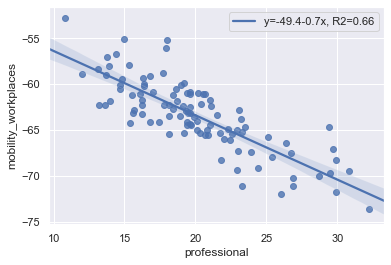

In [50]:
dependent_variable = 'mobility_workplaces'
explanatory_variable = 'professional'

ols = smf.ols(r'{0}'.format(dependent_variable)+ '~{0}'\
                    .format('Q("{0}")'.format(explanatory_variable)),\
                  df.dropna(subset=[dependent_variable]+[explanatory_variable])).fit()
intercept, slope, r_value = ols.params[0], ols.params[1], ols.rsquared_adj
    
ax = sns.regplot(x=explanatory_variable, y=dependent_variable, data=df.dropna(subset=[dependent_variable]+[explanatory_variable]), 
                 line_kws={'label':"y={0:.1f}{1:.1f}x, R2={2:.2f}".format(\
                                intercept, slope, r_value)}, )
ax.legend()

In [51]:
ols = smf.ols(r'{0}'.format(dependent_variable)+ '~{0}'\
                    .format('Q("{0}")'.format(explanatory_variable)),\
                  df.dropna(subset=[dependent_variable]+[explanatory_variable])).fit()

In [52]:
print(ols.summary())

                             OLS Regression Results                            
Dep. Variable:     mobility_workplaces   R-squared:                       0.662
Model:                             OLS   Adj. R-squared:                  0.659
Method:                  Least Squares   F-statistic:                     197.9
Date:                 Mon, 11 Jan 2021   Prob (F-statistic):           1.56e-25
Time:                         18:55:56   Log-Likelihood:                -229.96
No. Observations:                  103   AIC:                             463.9
Df Residuals:                      101   BIC:                             469.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -49.3647